In [12]:
import numpy as np
from sympy import Symbol, symbols, diff, simplify, lambdify, Array, init_printing, solve_linear_system, Matrix, init_printing
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
plt.rc('text', usetex=True)
plt.rcParams['font.weight'] = 700
plt.rcParams['xtick.top']='True'
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.right']='True'
plt.rcParams['ytick.direction']='in'
plt.rcParams['ytick.labelsize']=22
plt.rcParams['xtick.labelsize']=22
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.major.size']=6
plt.rcParams['xtick.minor.size']=3
plt.rcParams['ytick.major.size']=6
plt.rcParams['ytick.minor.size']=3
plt.rcParams['lines.markersize']=np.sqrt(36)
plt.rc('text',usetex=True)
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,amsfonts,amssymb,bm}"]

In [ ]:
class basis(): # defined on the canonical (master) element (1D : [-1,1] ) 
    def __init__(self,deg,basis_type):
        deg = int(deg)
        if basis_type == 'L':          # 1D Lagrange basis of degree `deg`
            z=Symbol('z')
            Xi=np.linspace(-1,3,deg+1) # note the end point 
            def lag_basis(k):   #basically change this
                n = 1.
                for i in range(len(Xi)):
                    if k != i:
                        n *= (z-Xi[i])/(Xi[k]-Xi[i])
                return n
            N = Array([simplify(lag_basis(m)) for m in range(deg+1)])            
            dfN = diff(N,z)+1.e-25*N #for shape consistency
            self.Ns=lambdify(z, N, "numpy")
            self.dN=lambdify(z, dfN, "numpy")
            self.enrich = 1  #enriched dofs (not needed for lagrange elements)

In [ ]:
elem = "L" #L -- lagrange polynomials
deg = 4
nBasis = basis(deg, elem)

In [ ]:
xv = np.linspace(-1,3,101)
N = nBasis.Ns(xv)
dN = nBasis.dN(xv)

In [ ]:
plt.figure(figsize=(10,8))
for i, phi in enumerate(np.array(N)):
    plt.plot(xv, phi, "-o", lw=2, label=r"$\phi_{}$".format(i+1), markevery=25)
plt.legend(loc=0, ncol=5, fontsize=22, fancybox=False, edgecolor="k", bbox_to_anchor=(1.12,1.12))

In [ ]:
uvals = 10**(-3)*np.array([1., 0, 1, 3, 4])

In [ ]:
udisp = np.array(N).T @ uvals

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(xv, udisp, lw=2, label=r"$u^h(x)$")
plt.legend(loc=0, fontsize=24)

In [ ]:
epsDIsp = np.array(dN).T @ uvals

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(xv, epsDIsp, lw=2, label=r"$\varepsilon^h(x)$")
plt.legend(loc=0, fontsize=24)

$C^1$: Hermite basis functions in $1D$

In [2]:
# Calculations for N1
a0, a1, a2, a3 = symbols("a0 a1 a2, a3", real=True)
xe1, xe2, z = symbols("xe_1, xe_2, xi", real=True)

In [3]:
# N1
sys1 = solve_linear_system(Matrix([[1, xe1, xe1**2, xe1**3, 1],
                                   [0, 1, 2*xe1, 3*xe1**2, 0],
                                   [1, xe2, xe2**2, xe2**3, 0],
                                   [0, 1, 2*xe2, 3*xe2**2, 0] ]),a0,a1,a2,a3)

In [4]:
a0 = simplify(a0.subs(sys1))
a1 = simplify(a1.subs(sys1))
a2 = simplify(a2.subs(sys1))
a3 = simplify(a3.subs(sys1))

In [5]:
# a0 = a0.subs([(xe1,-1), (xe2, 1)])
# a1 = a1.subs([(xe1,-1), (xe2, 1)])
# a2 = a2.subs([(xe1,-1), (xe2, 1)])
# a3 = a3.subs([(xe1,-1), (xe2, 1)])

In [6]:
# Ntilde_1
b0 , b1, b2, b3 = symbols("b0, b1, b2, b3")
sys2 = solve_linear_system(Matrix([[1, xe1, xe1**2, xe1**3, 0],
                                   [0, 1, 2*xe1, 3*xe1**2, 1],
                                   [1, xe2, xe2**2, xe2**3, 0],
                                   [0, 1, 2*xe2, 3*xe2**2, 0] ]),b0,b1,b2,b3)

In [7]:
b0 = simplify(b0.subs(sys2))
b1 = simplify(b1.subs(sys2))
b2 = simplify(b2.subs(sys2))
b3 = simplify(b3.subs(sys2))

# b0 = b0.subs([(xe1,-1), (xe2, 1)])
# b1 = b1.subs([(xe1,-1), (xe2, 1)])
# b2 = b2.subs([(xe1,-1), (xe2, 1)])
# b3 = b3.subs([(xe1,-1), (xe2, 1)])

In [13]:
init_printing()

In [20]:
N1subs = simplify(a0 + a1 * z + a2 * z**2 + a3 * z**3)
N1plot = lambdify([z, xe1, xe2], N1subs, "numpy")

In [9]:
from sympy.plotting import plot as symplot

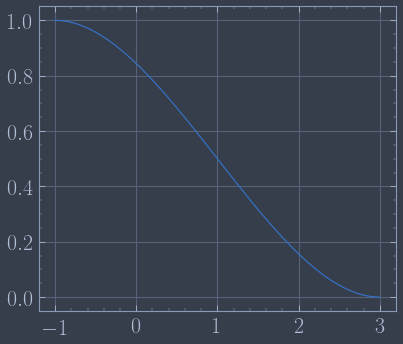

In [22]:
xe1 = -1
xe2 = 3
xv = np.linspace(xe1, xe2, 101)
plt.plot(xv, N1plot(xv, xe1, xe2))

In [ ]:
xv = np.linspace(-1, 1, 101)
N1plot = float(a0) + float(a1)*xv + float(a2)*xv**2 + float(a3)*xv**3
N1tilde = float(b0) + float(b1)*xv + float(b2)*xv**2 + float(b3)*xv**3
plt.figure()
plt.plot(xv, N1plot, lw=2, label=r"$N_1(x)$")
plt.plot(xv, N1tilde, lw=2, label=r"$\widetilde{N}_1(x)$")
plt.legend(loc=0, fontsize=22)

In [ ]:
from numpy.polynomial.legendre import leggauss

In [ ]:
gps, weights = leggauss(4)

In [ ]:
weights

In [ ]:
gps